ARIMA forecasts for electricity prices dataset of queensland for the year 2018

In [2]:
#import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import itertools
from statsmodels.tsa.statespace.sarimax import SARIMAX
import utils
import os
from datetime import datetime, timedelta

We will write two other scripts, one for parameter tuning and other for fetching data from AEMO website so that we dont have to deal with too many csv files, in this script we will use statistics and theory to determine the order of ARIMA model.

In [3]:
#dataset
prices = pd.read_csv(r"C:\Users\Adithiyha R\Downloads\prices_dataset (3).csv")
prices['SETTLEMENTDATE'] = pd.to_datetime(prices['SETTLEMENTDATE'])
prices = prices.set_index(['SETTLEMENTDATE'])

In [4]:
prices.describe()
prices.head(10)

,RRP
SETTLEMENTDATE,
2018-01-01 00:30:00,81.27
2018-01-01 01:00:00,78.02
2018-01-01 01:30:00,65.02
2018-01-01 02:00:00,64.85
2018-01-01 02:30:00,64.23
2018-01-01 03:00:00,63.36
2018-01-01 03:30:00,64.03
2018-01-01 04:00:00,61.29
2018-01-01 04:30:00,60.04


We will try seasonal differencing of data and see the rolling statistics and the distribution of data

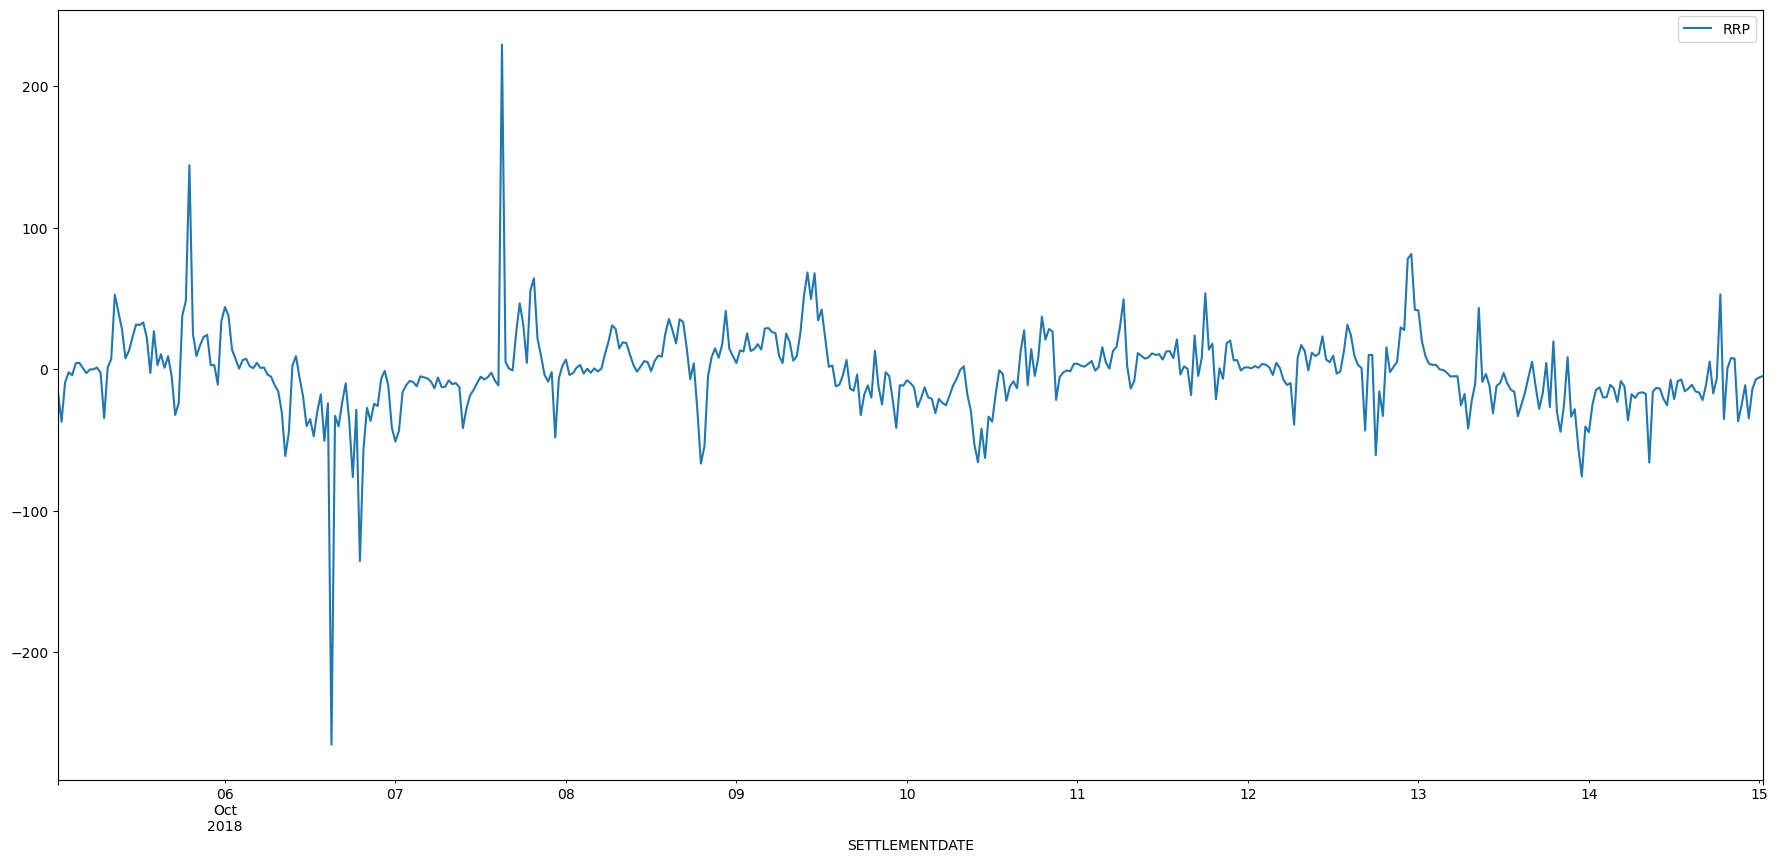

In [5]:
#seasonal differencing by 24 hours, 48 observations and plotting it
start_date = datetime(2018,10,5,0,30,0)
period = 10  # observing prices for a period of 10 days
end_date = start_date + timedelta(days = period)
diff_price_series = prices.diff(periods = 48)
diff_price_series.dropna()[start_date:end_date].plot(figsize = (22,10))
plt.legend()
plt.show()

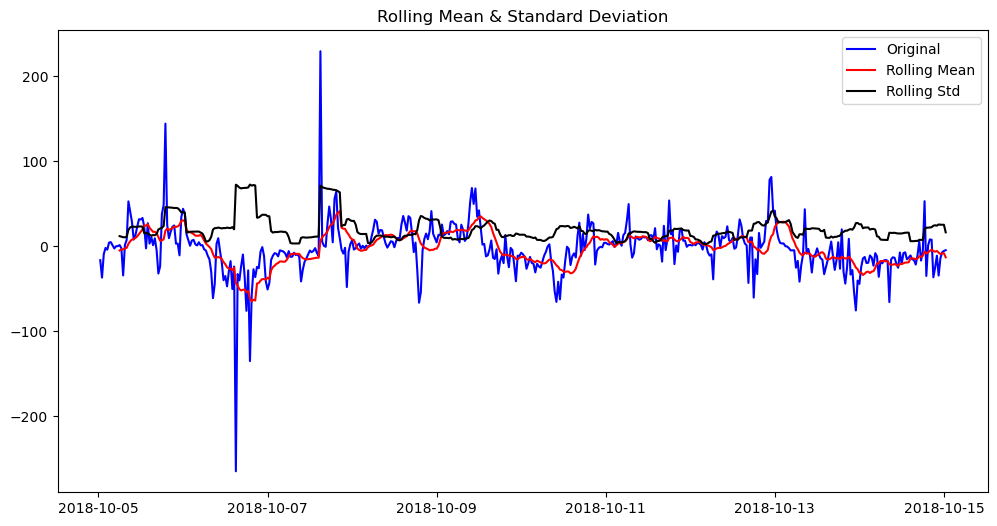

In [6]:
def plot_rolling_stats(series, window=12):
    """
    Plots the rolling mean and rolling standard deviation.
    
    Parameters:
    series (pd.Series): The time series data.
    window (int): The window size for calculating rolling statistics.
    """
    rolling_mean = series.rolling(window=window).mean()
    rolling_std = series.rolling(window=window).std()

    plt.figure(figsize=(12, 6))
    plt.plot(series, color='blue', label='Original')
    plt.plot(rolling_mean, color='red', label='Rolling Mean')
    plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

# Example usage:
plot_rolling_stats(diff_price_series.dropna()[start_date:end_date])


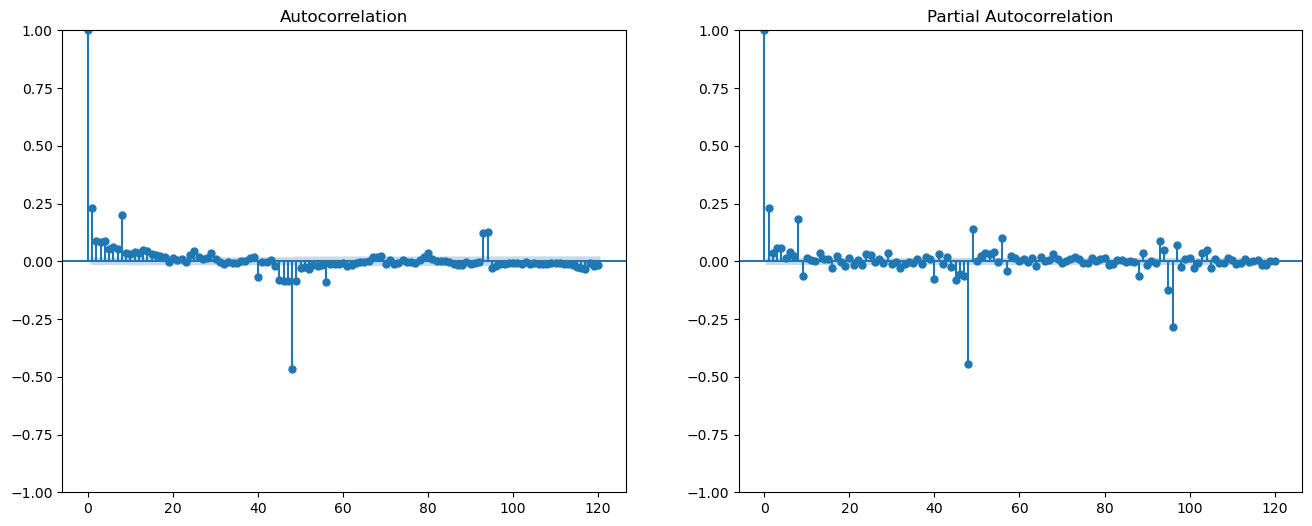

In [7]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def plot_acf_pacf(series, n_lags=40):
    """
    Plots the ACF and PACF for a given time series.
    
    Parameters:
    series (pd.Series): The time series data.
    n_lags (int): Number of lags to include in the plots.
    """
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    plot_acf(series, lags=n_lags, ax=axes[0])
    plot_pacf(series, lags=n_lags, ax=axes[1])
    plt.show()

# Example usage:
plot_acf_pacf(diff_price_series.dropna(), n_lags=120)


Lets make an SARIMA model as follows and restrict our parameter grid for grid search within this range only p- number of auto regressivc terms, 8 as the PACF lags are not significant d - non seasonal differences, 0 as no non seasonal difference is there q - number of moving average terms, 8 as the ACF lags are not significant after that P - number of seasonal auto regressive terms, 1 from the PACF plot(after 48th lag, there are not significant lags) D- seasonal differences, 1 Q - number of seasonal moving average terms, 1 from the ACF plot S- 48 therefore (p,d,q) = (8,0,8) or (8,1,8) (P,D,Q,S) = (1,1,1,48)

In [ ]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Ensure the date index is monotonic
prices = prices.sort_index()

# If the inferred frequency is correct (30 minutes in this case), set it explicitly
prices = prices.asfreq('30T')

# Fit the SARIMAX model
model = SARIMAX(prices, order=(8, 0, 8), seasonal_order=(1, 1, 1, 48)).fit(disp=-1)

